In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [3]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
print("Python version %s.%s.%s" % sys.version_info[:3])
print("Tensorflow version %s" % tf.__version__)
print("Keras version %s" % keras.__version__)

Python version 3.9.11
Tensorflow version 2.8.0
Keras version 2.8.0


Import data from csv file 

In [4]:
import pandas as pd
labels = pd.read_csv('CSV Filenames DL SP22.csv')
labels.head()

,FILENAME,AGE
0,1_0_0_20161219140623097.jpg.chip.jpg,1
1,1_0_0_20161219140627985.jpg.chip.jpg,1
2,1_0_0_20161219140642920.jpg.chip.jpg,1
3,1_0_0_20161219154018476.jpg.chip.jpg,1
4,1_0_0_20161219154556757.jpg.chip.jpg,1


In [5]:
labels

,FILENAME,AGE
0,1_0_0_20161219140623097.jpg.chip.jpg,1
1,1_0_0_20161219140627985.jpg.chip.jpg,1
2,1_0_0_20161219140642920.jpg.chip.jpg,1
3,1_0_0_20161219154018476.jpg.chip.jpg,1
4,1_0_0_20161219154556757.jpg.chip.jpg,1
...,...,...
9775,100_1_0_20170110183726390.jpg.chip.jpg,100
9776,100_1_2_20170105174847679.jpg.chip.jpg,100
9777,101_1_2_20170105174739309.jpg.chip.jpg,101
9778,110_1_1_20170110155201038.jpg.chip.jpg,110


In [6]:
label_1 = "%s - %s" %((labels["AGE"][0]) , (labels["AGE"][1870]))
label_2 = "%s - %s" %((labels["AGE"][1871]) , (labels["AGE"][2786]))
label_3 = "%s - %s" %((labels["AGE"][2787]) , (labels["AGE"][3821]))
label_4 = "%s - %s" %((labels["AGE"][3822]) , (labels["AGE"][4980]))
label_5 = "%s - %s" %((labels["AGE"][4981]) , (labels["AGE"][6027]))
label_6 = "%s - %s" %((labels["AGE"][6027]) , (labels["AGE"][6939]))
label_7 = "%s - %s" %((labels["AGE"][6939]) , (labels["AGE"][7980]))
label_8 = "%s - %s" %((labels["AGE"][7980]) , (labels["AGE"][8833]))
label_9 = "%s - %s" %((labels["AGE"][8834]) , (labels["AGE"][9779]))

total_labels = [label_1,
                label_2,
                label_3,
                label_4,
                label_5,
                label_6,
                label_7,
                label_8,
                label_9]

total_labels

['1 - 3',
 '4 - 8',
 '9 - 16',
 '17 - 25',
 '26 - 32',
 '32 - 42',
 '42 - 55',
 '55 - 66',
 '67 - 110']

Code for the extracting the image and perform it to the numpy array

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
#import os
#print(os.getcwd())
img_width = 224

def get_image(filename):
    ########################################################################
    # TODO: Your code here...
    original = load_img(filename, target_size=(224, 224))
    #print(original.size)
    
    numpy_image = img_to_array(original)
    #print(numpy_image.shape)
    return numpy_image
    ########################################################################

testing the image

(224, 224, 3)


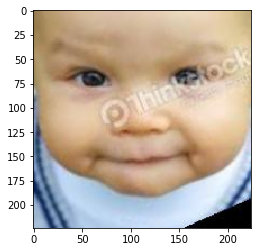

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('UTKFace/%s' % labels['FILENAME'][0])
print(image.shape)
plt.imshow(np.uint8(image))
plt.show()

In [9]:
num_train_images = 9780 
split_point = 7000
num_classes = 9
arr = [i for i in range(num_classes)]
arr

[0, 1, 2, 3, 4, 5, 6, 7, 8]

function to perform labels from csv file

In [10]:
def assign_num(num):
    if (1 <= num <= 3):
        return 0
    if (4 <= num <= 8):
        return 1
    if (9 <= num <= 16):
        return 2
    if (17 <= num <= 25):
        return 3
    if (26 <= num <= 32):
        return 4
    if (33 <= num <= 42):
        return 5
    if (43 <= num <= 55):
        return 6
    if (56 <= num <= 66):
        return 7
    if (67 <= num <= 110):
        return 8

In [11]:
assign_num(labels["AGE"][9779])

8

In [12]:
x = np.zeros((num_train_images, img_width, img_width, 3), dtype=np.uint8)
y = np.zeros((num_train_images, num_classes), dtype=np.uint8)



count = 0

for i in range(num_train_images):
    x[i] = get_image('crop_part1/%s' % labels['FILENAME'][i])
    y[i][assign_num(labels["AGE"][i])] = 1
    count += 1
    if(count % 1000 == 0): print(count, 'images loaded')

1000 images loaded
2000 images loaded
3000 images loaded
4000 images loaded
5000 images loaded
6000 images loaded
7000 images loaded
8000 images loaded
9000 images loaded


In [13]:
num = 9778
print("orig : %d" % labels["AGE"][num])
print(y[num])

orig : 110
[0 0 0 0 0 0 0 0 1]


In [14]:
y.shape

(9780, 9)

In [15]:
x.shape

(9780, 224, 224, 3)

In [16]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [18]:
#X_test.shape

In [19]:
#y_test.shape

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import inception_v3 

vgg16_model = vgg16.VGG16(weights='imagenet', include_top=True)
#inceptionV3_model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

#new_vgg16 = Model(inputs = vgg16_model.input, outputs = vgg16_model.get_layer('fc2').output)

#new_resnet50 = Model(inputs = resnet50.input, outputs = resnet50.get_layer('avg_pool').output)

#vgg16_model.summary()
#new_vgg16.summary()

Create vgg model => (to extract features)

In [21]:
new_vgg16 = Model(inputs = vgg16_model.input, outputs = vgg16_model.get_layer('fc2').output)

In [22]:
new_vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
inceptionV3_model = inception_v3.InceptionV3(input_shape = (224, 224, 3), 
                                             weights='imagenet', include_top=False)

In [24]:
#new_inceptionV3 = Model(inputs = inceptionV3_model.input, outputs = finceptionV3_model.get_layer('avg_pool').output)
new_inceptionV3 = inceptionV3_model
final_layer = tf.keras.layers.Flatten()(new_inceptionV3.output)
f_inceptionV3 = Model(inputs = inceptionV3_model.input, outputs = final_layer )

In [25]:
f_inceptionV3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [28]:
#Preprocessing data

x_for_vgg = tf.keras.applications.vgg16.preprocess_input(x)


In [29]:
#x_for_inc = tf.keras.applications.inception_v3.preprocess_input(x)
x_for_inc = keras.applications.imagenet_utils.preprocess_input(x)

In [30]:

vgg16_predictions = new_vgg16.predict(x_for_vgg, batch_size=16, verbose=1)

612/612 [==============================] - 572s 929ms/step


In [31]:
inception_predictions = f_inceptionV3.predict(x_for_inc, batch_size=16, verbose=1)

612/612 [==============================] - 211s 343ms/step


Sanity check

In [32]:
vgg16_predictions.shape

(9780, 4096)

In [33]:
inception_predictions.shape

(9780, 51200)

In [34]:
combined_features = np.concatenate([inception_predictions, vgg16_predictions],axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.1, random_state=42)

In [36]:
X_train.shape

(8802, 55296)

In [37]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Activation, BatchNormalization

combined_inputs = Input(shape = (55296))
x = Dropout(0.7)(combined_inputs) # add a dropout layer
x = BatchNormalization()(x)
x = Dense(512)(x) # add a dense layer, but not adding activation so that we can add batch-norm first
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.3)(x) # add a dropout layer
# Softmax layer to the output classes
new_predictions = Dense(num_classes, activation='softmax')(x) # arg1 is: units = dimensionality of the output space.

In [38]:
from tensorflow.keras.models import Model
model = Model(inputs=combined_inputs, outputs=new_predictions) # specify what is network input, and what is network output
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 55296)]           0         
                                                                 
 dropout (Dropout)           (None, 55296)             0         
                                                                 
 batch_normalization_94 (Bat  (None, 55296)            221184    
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 512)               28312064  
                                                                 
 batch_normalization_95 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_94 (Activation)  (None, 512)               0   

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',  patience=6, verbose=1)
# stop if loss does not improve for 3 iterations

model.fit(X_train, y_train, batch_size=128, epochs=30, 
              validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/30
69/69 [==============================] - 17s 224ms/step - loss: 1.7698 - accuracy: 0.3849 - val_loss: 1.8417 - val_accuracy: 0.4264
Epoch 2/30
69/69 [==============================] - 15s 222ms/step - loss: 1.2580 - accuracy: 0.5312 - val_loss: 1.5022 - val_accuracy: 0.4499
Epoch 3/30
69/69 [==============================] - 15s 218ms/step - loss: 1.0768 - accuracy: 0.6053 - val_loss: 1.4665 - val_accuracy: 0.4632
Epoch 4/30
69/69 [==============================] - 15s 223ms/step - loss: 0.9301 - accuracy: 0.6629 - val_loss: 1.4345 - val_accuracy: 0.4847
Epoch 5/30
69/69 [==============================] - 15s 221ms/step - loss: 0.7926 - accuracy: 0.7115 - val_loss: 1.4634 - val_accuracy: 0.4796
Epoch 6/30
69/69 [==============================] - 15s 217ms/step - loss: 0.7117 - accuracy: 0.7455 - val_loss: 1.5499 - val_accuracy: 0.4734
Epoch 7/30
69/69 [==============================] - 15s 217ms/step - loss: 0.6344 - accuracy: 0.7757 - val_loss: 1.5553 - val_accuracy: 0.4765